Optimization terminated successfully.
         Current function value: 33.869670
         Iterations: 234
         Function evaluations: 426
[0.000 0.003 8.132]
5.03509194283e-05 0.00341838112195 8.13175798184


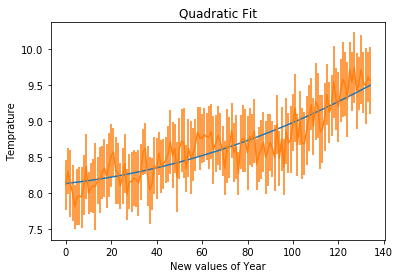

In [3]:
#Importing the data and Adding the column

import numpy as np
import pandas as pd
import xlwt
import matplotlib.pyplot as plt                                                 #importing libraries 

data = pd.read_excel('random.xlsx')                                             #importing data from excel file through pandas 
array= data.values                                                              #converting pandas into numphy

tempfix = lambda t : t + 8.68                                                   #creating a function of type f(x)=x+8.86
vtempfix= np.vectorize(tempfix)                                                 #vectorizing the function to operate on a column
newcolumn = vtempfix(array[:,5])                                                #operating the function on column 6
reshapenewcolumn = np.reshape(newcolumn, (newcolumn.size, 1))                   #reshaping the data
betterdata=np.append(array,reshapenewcolumn,axis=1)                             #combining the new column with old data   
np.set_printoptions(edgeitems=4,formatter={'float_kind':'{:0.3f}'.format})     # changing to decimal format and precession to 3 

#print(betterdata)  


#Functions 
def avg(y):                                   #Defining a function avg(y) that finds the avrage temprature of year 'y'
    
    i=range(0,49307)
    j=range(1,365)
    req=[]
    for elm in i:
         if betterdata[elm,1] == y:                         #collecting temprature data of year 'y'
            req.append(betterdata[elm,:])
    reqarray = np.vstack([req[x] for x in j])          
    
    return float(str(round(np.sum(reqarray[:,6])/365, 3)))  #finding their mean    

def sd(y):                                   #Defining a function sd(y) that finds the standard deviation temprature of year 'y'

    i=range(0,49307)
    j=range(1,365)
    req=[]
    for elm in i:
         if betterdata[elm,1] == y:
            req.append(betterdata[elm,:])
    reqarray = np.vstack([req[x] for x in j]) 
    
    return float(str(round(365*np.std(reqarray[:,6])/364, 3)))  #finding the standard deviation       

#EROOR BAR PLOT

  
p=range(1880,2015)
x1=[]
y1=[]
sdv=[]
for l in p:        
        x1.append(l)
        y1.append(avg(l))                    #appending avrage values to variable y1
        sdv.append(sd(l))                    #appending avrage values to variable sdv
        
    

#print(sdv)
 
import scipy.optimize as opt

temp =y1 
y = np.arange(0,135)
err_temp = sdv

def chisq(para):    
    d=0
    a=para[0]
    b=para[1]
    c=para[2]
    i=range(0,135)
    for elem in i: 
        
        d= d + ((temp[elem] - c - b*y[elem] - a*y[elem]*y[elem])/err_temp[elem])**2
    return d

x0 = [0,0,0]

res = opt.minimize(chisq, x0,  method='nelder-mead',options={'xtol': 1e-8, 'disp': True})
print(res.x)
a,b,c=res.x
print(a,b,c)
#plt.scatter(y,temp)
plt.plot(y,c + b*y + a*y*y)
plt.errorbar(y, temp,yerr=sdv)
plt.title('Quadratic Fit')
plt.xlabel('New values of Year')
plt.ylabel('Temprature')
plt.show()
